# House Price Prediction Project

# Problem Statement

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

-- Which variables are significant in predicting the price of a house, and

-- How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## Bussiness Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# Read / Understand the data

In [1]:
#Import Pandas and numpy package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data lookup 

In [2]:
# Read the CSV file and display some records
housing_data = pd.read_csv("train.csv")
housing_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#Shape of the data sheet
housing_data.shape

(1460, 81)

In [4]:
#Summary of the data set
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#Lets see all columns 
housing_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
# Identify all the data type
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Checking null value of the data set
housing_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#Droping the columns having max value of Null value
housing_data = housing_data.drop(columns=['PoolQC','Fence', 'MiscFeature'])

In [9]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
#Checking Alley value in count
housing_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
#checking unique values of FireplaceQu 
housing_data.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [13]:
#checking Missing values of columns
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
dtype: int64

In [14]:
#Droping Alley column because more than 90% values are missing or No Alley
housing_data=housing_data.drop(columns=['Alley'])

In [15]:
#replace Nan values of FireplaceQu with NA
housing_data.FireplaceQu = housing_data.FireplaceQu.fillna('NA')

In [16]:
#check missing values in housing data
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [17]:
#check unique values of LotFrontage
housing_data.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [19]:
#checking median of LotFrontage
LotFrontage_median = housing_data.LotFrontage.median()
LotFrontage_median

69.0

In [21]:
#fill missing values of LotFrontage 
housing_data.LotFrontage = housing_data.LotFrontage.fillna(LotFrontage_median)

In [22]:
#fill missing values of MasVnrArea with median due to some outliers in data shown from Descibe section
housing_data.MasVnrArea = housing_data.MasVnrArea.fillna(housing_data.MasVnrArea.median())

In [25]:
#replace Nan values of MasVnrArea with None 
housing_data.MasVnrType = housing_data.MasVnrType.fillna('None')

In [27]:
#replace Nan values of BsmtQual with NA 
housing_data.BsmtQual = housing_data.BsmtQual.fillna('NA')

In [28]:
#replace Nan values of BsmtCond with NA 
housing_data.BsmtCond = housing_data.BsmtCond.fillna('NA')

In [29]:
#replace Nan values of BsmtExposure with No 
housing_data.BsmtExposure = housing_data.BsmtExposure.fillna('No')

In [30]:
#replace Nan values of BsmtFinType1 with NA 
housing_data.BsmtFinType1 = housing_data.BsmtFinType1.fillna('NA')

In [31]:
#replace Nan values of BsmtFinType2 with NA 
housing_data.BsmtFinType2 = housing_data.BsmtFinType2.fillna('NA')

In [32]:
#impute missing values of Electrical with mode due to categorical column
housing_data.Electrical = housing_data.Electrical.fillna(housing_data.Electrical.mode()[0])   

In [35]:
#replace Nan values of GarageType with NA 
housing_data.GarageType = housing_data.GarageType.fillna('NA')

In [36]:
#replace Nan values of GarageYrBlt with 0
housing_data.GarageYrBlt = housing_data.GarageYrBlt.fillna(0)

In [38]:
#replace Nan values of GarageFinish with NA 
housing_data.GarageFinish = housing_data.GarageFinish.fillna('NA')

In [39]:
#replace Nan values of GarageQual with NA
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [41]:
#replace Nan values of GarageFinish with NA 
housing_data.GarageQual = housing_data.GarageQual.fillna('NA')

In [42]:
#replace Nan values of GarageCond with NA 
housing_data.GarageCond = housing_data.GarageCond.fillna('NA')

In [43]:
#check missing values again
housing_data.isnull().sum()[housing_data.isnull().sum()>0]

Series([], dtype: int64)

In [44]:
#calculate the age of house 
housing_data['HouseAge'] = housing_data.YrSold - housing_data.YearBuilt

In [46]:
#Droping YrSold, YearBuilt after HouseAge
housing_data=housing_data.drop(columns=['YrSold', 'YearBuilt'])

In [47]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
housing_data = housing_data.astype(convert_dict)

In [48]:
#convert ExterQual 1,2,3,4,5 : Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [49]:
#convert BsmtQual 0,1,2,3,4,5 : NA, Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [50]:
#convert BsmtExposure 0,1,2,3,4 : NA, No, Mn, Av, gd
housing_data = housing_data.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})

In [52]:
#convert BsmtFinType1 0,1,2,3,4,5,6 : NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
housing_data = housing_data.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

In [54]:
#convert HeatingQC 1,2,3,4,5 : Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [55]:
#convert KitchenQual 1,2,3,4,5 : Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [56]:
#convert FireplaceQu 0,1,2,3,4,5 : NA, Po, Fa, TA, Gd, Ex
housing_data = housing_data.replace({'FireplaceQu':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

In [58]:
#Counting for ExterQual value
housing_data.ExterQual.value_counts()

3    906
4    488
5     52
2     14
Name: ExterQual, dtype: int64

In [61]:
#fetch final data
housing_data.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

In [63]:
#Funcation for housing data normalize
for c in housing_data.columns:
    if housing_data[c].dtype == np.object :
        print(c)
        print(housing_data[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

C:\Users\Nishant\AppData\Local\Temp/ipykernel_5164/2883157924.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if housing_data[c].dtype == np.object :


In [67]:
#Drop columns containing 80% irrelevant data
housing_data=housing_data.drop(columns=['Id','Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [68]:
#fetch again final data
housing_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  RoofStyle      1460 non-null   object 
 12  Exterior1st    1460 non-null   object 
 13  Exterior2nd    1460 non-null   object 
 14  MasVnrType     1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   int64  
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [70]:
#Fetch all object type columns
object_columns = []
for c in housing_data.columns:
    if housing_data[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


C:\Users\Nishant\AppData\Local\Temp/ipykernel_5164/2221964639.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if housing_data[c].dtype == np.object:


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

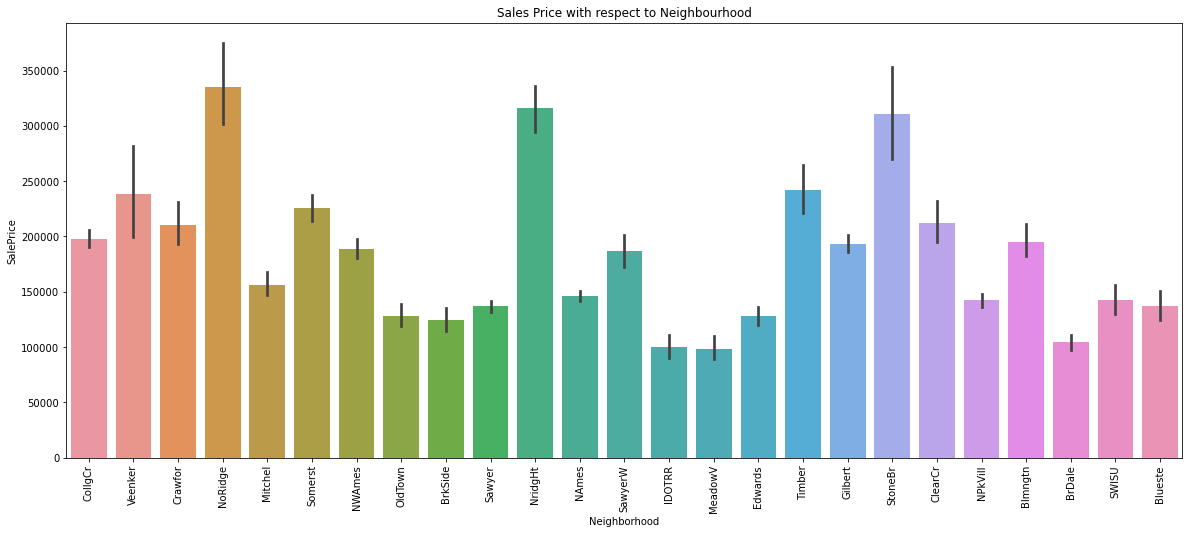

In [71]:
# plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

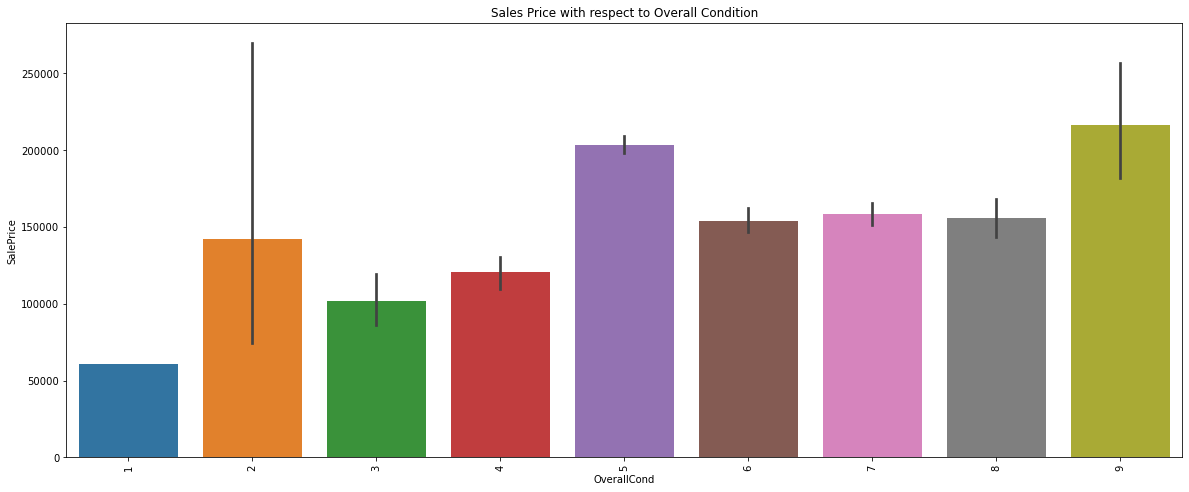

In [72]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

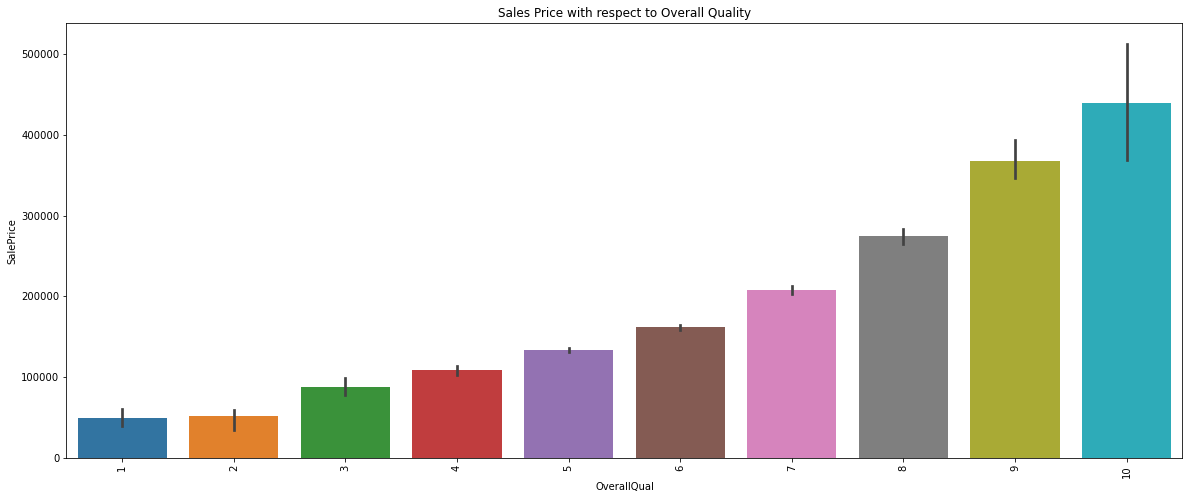

In [74]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= housing_data)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

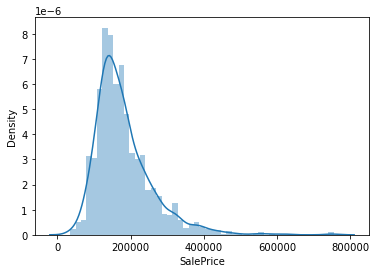

In [76]:
sns.distplot(housing_data['SalePrice'])

In [78]:
# correlation matrix
cor = housing_data.corr()
cor

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,HouseAge
LotFrontage,1.000000,0.304522,0.234812,-0.053281,0.083348,0.178469,0.165567,0.141836,0.161535,0.072566,...,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.334771,-0.116223
LotArea,0.304522,1.000000,0.105806,-0.005636,0.013788,0.103321,0.055570,0.072336,0.232300,0.058995,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,0.263843,-0.014832
OverallQual,0.234812,0.105806,1.000000,-0.091932,0.550684,0.407252,0.726278,0.629379,0.273214,0.232503,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,0.790982,-0.572629
OverallCond,-0.053281,-0.005636,-0.091932,1.000000,0.073741,-0.125694,-0.138942,-0.164996,-0.071234,-0.014479,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,-0.077856,0.377325
YearRemodAdd,0.083348,0.013788,0.550684,0.073741,1.000000,0.176529,0.587318,0.515013,0.207239,0.224383,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.507101,-0.590360
MasVnrArea,0.178469,0.103321,0.407252,-0.125694,0.176529,1.000000,0.345329,0.277490,0.170964,0.184728,...,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,0.472614,-0.311479
ExterQual,0.165567,0.055570,0.726278,-0.138942,0.587318,0.345329,1.000000,0.565558,0.238598,0.226197,...,0.207932,0.291553,-0.149589,0.036934,0.012688,0.034766,-0.039310,0.042790,0.682639,-0.597522
BsmtQual,0.141836,0.072336,0.629379,-0.164996,0.515013,0.277490,0.565558,1.000000,0.313437,0.377398,...,0.252703,0.253999,-0.181533,0.008097,0.034396,0.026415,-0.044404,0.015662,0.585207,-0.602798
BsmtExposure,0.161535,0.232300,0.273214,-0.071234,0.207239,0.170964,0.238598,0.313437,1.000000,0.315449,...,0.241463,0.077725,-0.097883,-0.015150,0.036585,0.041617,-0.013035,0.017957,0.361863,-0.288584
BsmtFinType1,0.072566,0.058995,0.232503,-0.014479,0.224383,0.184728,0.226197,0.377398,0.315449,1.000000,...,0.172112,0.089053,-0.136997,0.040912,0.022252,0.031833,0.012356,-0.034467,0.304908,-0.348123


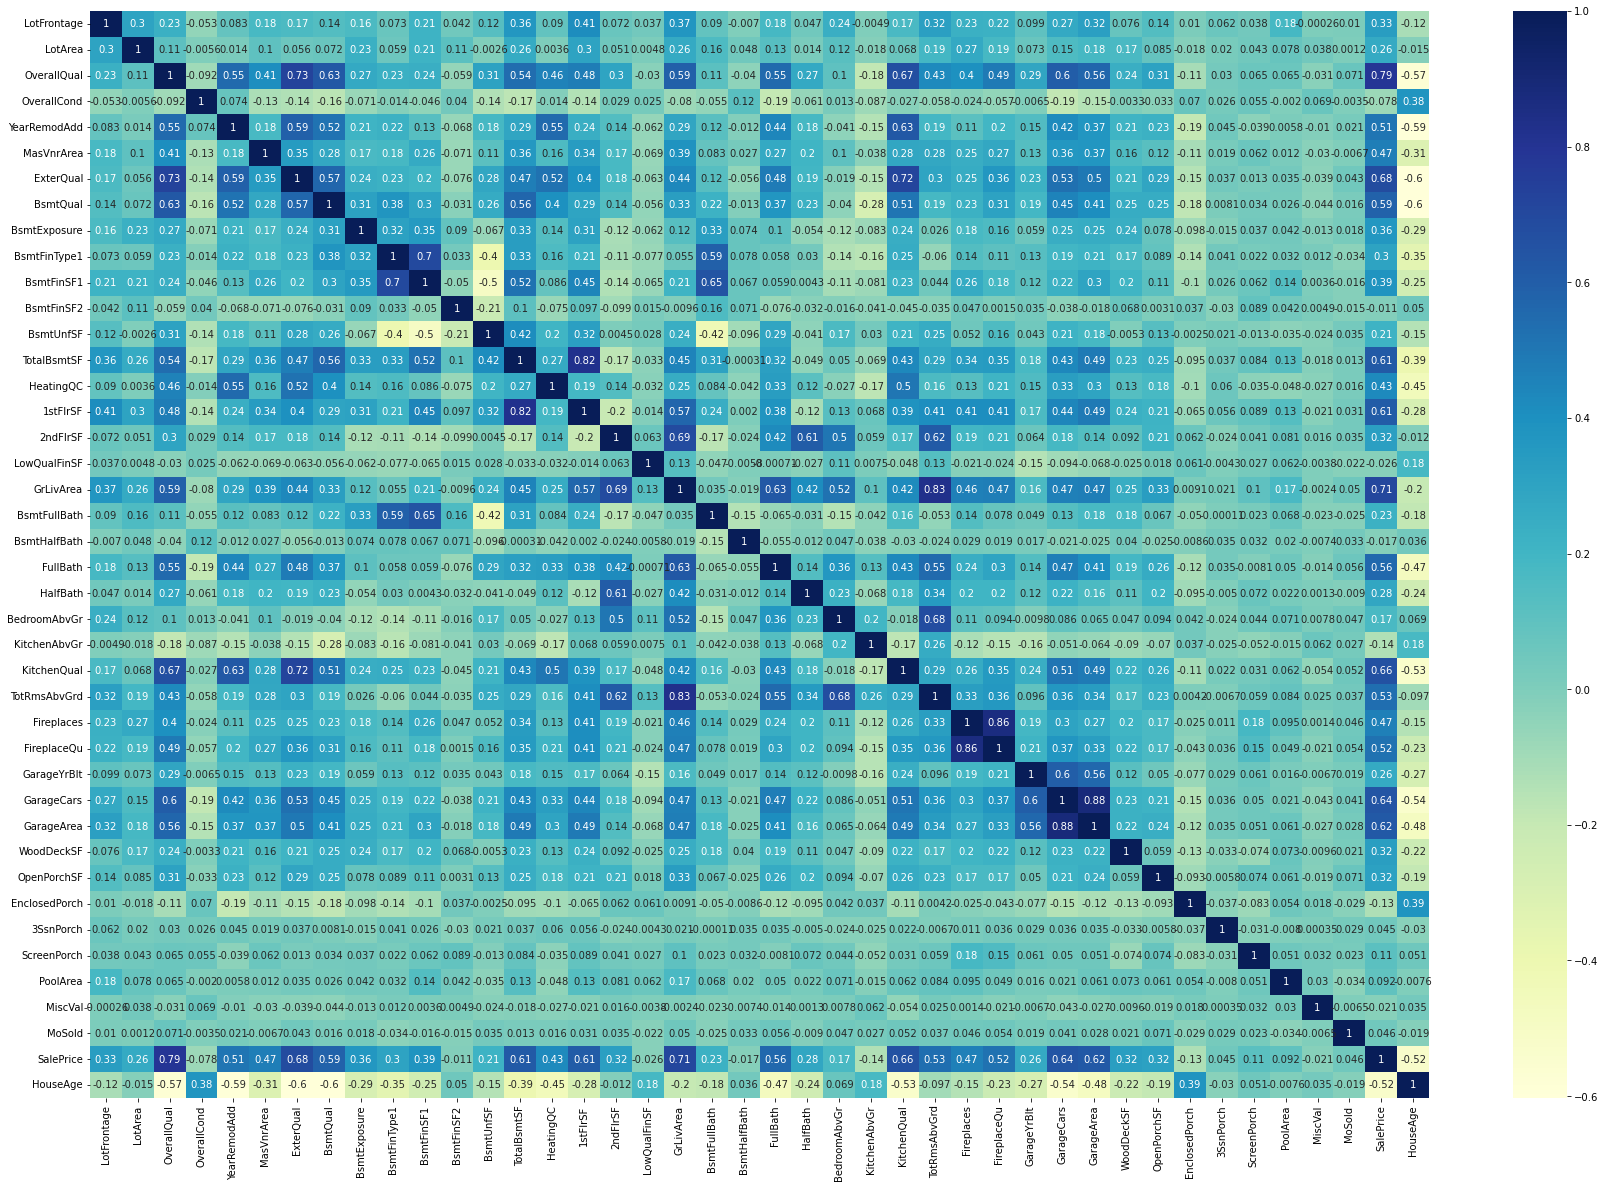

In [80]:

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

#####  Data Readiness

##### Creating Dummy columns to convert categorical into numerical

In [81]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(housing_data['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
housing_data = pd.concat([housing_data,MSSubClass_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [82]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(housing_data['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [85]:
#concat MSZoning_df with main house_data df
housing_data = pd.concat([housing_data,MSZoning_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,0,1,0


In [86]:
#creating dummy variable for LotShape
LotShape_df = pd.get_dummies(housing_data['LotShape'],drop_first=True, prefix='LotShape')

In [89]:
#concat LotShape_df with main house_data df
housing_data = pd.concat([housing_data,LotShape_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,1,0,0,0,0


In [91]:
#creating dummy variable for LotConfig
LotConfig_df = pd.get_dummies(housing_data['LotConfig'],drop_first=True, prefix='LotConfig')

In [93]:
#concat LotConfig_df with main house_data df
housing_data = pd.concat([housing_data,LotConfig_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,1,0,0,0,1
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,1,0,1,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,0,1
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,1,0,0


In [95]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(housing_data['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main house_data df
housing_data = pd.concat([housing_data,Neighborhood_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,0,0,0,0,0,0


In [98]:
#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(housing_data['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main house_data df
housing_data = pd.concat([housing_data,HouseStyle_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [99]:
#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(housing_data['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main house_data df
housing_data = pd.concat([housing_data,RoofStyle_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,1,0,0,1,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,1,0,0,0,0


In [100]:
#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(housing_data['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main house_data df
housing_data = pd.concat([housing_data,Exterior1st_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [101]:
#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(housing_data['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main house_data df
housing_data = pd.concat([housing_data,Exterior2nd_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,1,0,0,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,0,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,0,0,0,1,0,0


In [103]:
#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(housing_data['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main house_data df
housing_data = pd.concat([housing_data,MasVnrType_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,0,0,1,0,0,1,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,1,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,0,0,1,0,0,1,0,0


In [104]:
#create dummy variable for Foundation
Foundation_df = pd.get_dummies(housing_data['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main house_data df
housing_data = pd.concat([housing_data,Foundation_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,1,0,1,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,0,1,0,0,0,1,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,1,0,1,0,0,0,0,0,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,0,1,0,0,0,1,0,0,0


In [105]:
#create dummy variable for GarageType
GarageType_df = pd.get_dummies(housing_data['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main house_data df
housing_data = pd.concat([housing_data,GarageType_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,0,0,0,1,0,0,0,0,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,1,0,0,0,1,0,0,0,0,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,0,0,0,1,0
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,1,0,0,0,1,0,0,0,0,0


In [107]:
#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(housing_data['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main house_data df
housing_data = pd.concat([housing_data,GarageFinish_df],axis=1)
housing_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,...,0,1,0,0,0,0,0,0,1,0
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,...,0,1,0,0,0,0,0,0,1,0
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,...,0,0,0,0,0,1,0,0,0,1
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,...,0,1,0,0,0,0,0,0,1,0


In [109]:
#See the shape
housing_data.shape

(1460, 162)

In [110]:
#Dropping categorical variables after ceating dummy varaibles
housing_data=housing_data.drop(columns=['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])

In [112]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 149 entries, LotFrontage to GarageFinish_Unf
dtypes: float64(3), int64(39), uint8(107)
memory usage: 631.7 KB


#### Building linear model 

In [114]:
df_train,df_test = train_test_split(housing_data,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 149)
(439, 149)


In [115]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Rescalling The Numeric Factors

In [117]:
from sklearn.preprocessing import StandardScaler
#instantiate the object
scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           , 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'HouseAge']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

C:\Users\Nishant\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [118]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,1.628907e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###### Training The Model

In [119]:
#create X_train,y_train 
y_train = df_train.pop('SalePrice')
X_train = df_train

In [120]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=148)

### Recursive Feature Elimination

###### Consider top 35 RFE

In [121]:
#Running RFE with the out variables equals to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 35)
rfe = rfe.fit(X_train,y_train)

C:\Users\Nishant\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=35 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [122]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 45),
 ('LotArea', False, 25),
 ('OverallQual', True, 1),
 ('OverallCond', False, 37),
 ('YearRemodAdd', False, 94),
 ('MasVnrArea', False, 41),
 ('ExterQual', False, 101),
 ('BsmtQual', True, 1),
 ('BsmtExposure', False, 5),
 ('BsmtFinType1', False, 44),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', False, 112),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 38),
 ('BsmtHalfBath', False, 79),
 ('FullBath', False, 106),
 ('HalfBath', False, 102),
 ('BedroomAbvGr', False, 61),
 ('KitchenAbvGr', False, 59),
 ('KitchenQual', False, 13),
 ('TotRmsAbvGrd', False, 57),
 ('Fireplaces', False, 107),
 ('FireplaceQu', False, 42),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 6),
 ('GarageArea', False, 103),
 ('WoodDeckSF', False, 85),
 ('OpenPorchSF', False, 100),
 ('EnclosedPorch', False, 111),
 ('3SsnPorch', False, 54

In [123]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'GarageYrBlt', 'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160',
       'LotShape_IR3', 'LotConfig_FR2', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1Story', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_Stone', 'Exterior2nd_AsphShn', 'Exterior2nd_BrkFace',
       'Exterior2nd_CBlock', 'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc',
       'Exterior2nd_Stone', 'GarageType_NA', 'GarageFinish_NA'],
      dtype='object')

In [124]:
#skipped columns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC',
       'BsmtFullBath',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=113)

###### Model Building using StatsModel

In [125]:
#ceatinf X_train with RFE selected columns
X_train_rfe = X_train[col]

In [126]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [127]:
#create a RFE model #Running the linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [128]:

#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:09:31   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     990   BIC:                         2.442e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6708.012     20.023      0.000    1.21e+05    1.47e+05
OverallQual           2.662e+04   1897.199     14.029      0.000    2.29e+04    3.03e+04
BsmtQual              1.157e+04   1866.711      6.201      0.000    7911.699    1.52e+04
BsmtFinSF1            3258.5784   1083.610      3.007      0.003    1132.142    5385.015
BsmtFinSF2             518.1917   1096.585      0.473      0.637   -1633.707    2670.091
BsmtUnfSF            -5391.8117   1053.378     -5.119      0.000   -7458.921   -3324.703
TotalBsmtSF          -1776.0290   1738.309     -1.022      0.307   -5187.223    1635.165
1stFlrSF              1.368e+04   1819.503      7.518      0.000    1.01e+04    1.72e+04
2ndFlrSF              9973.0375   1485.844      6.712      0.000    7057.273    1.29e+04
LowQualFinSF         -1631.1512   1247.009     -1.308      0.191   -4078.236     815.934
GrLivArea             1.825e+04   1080.585     16.891      0.000    1.61e+04    2.04e+04
GarageYrBlt           1.523e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.738e+04   6059.035     -2.869      0.004   -2.93e+04   -5493.399
MSSubClass_120       -2.965e+04   5026.288     -5.900      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.139e+04   5627.015     -5.578      0.000   -4.24e+04   -2.03e+04
LotShape_IR3         -3.611e+04    1.2e+04     -3.022      0.003   -5.96e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6472.636     -2.118      0.034   -2.64e+04   -1010.202
Neighborhood_NoRidge   5.18e+04   6673.902      7.761      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.815e+04   5296.634      9.092      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr   3.27e+04   1.03e+04      3.169      0.002    1.25e+04     5.3e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.837      0.005    9666.303     5.3e+04
HouseStyle_1Story     1.772e+04   3880.860      4.565      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin     -2.33e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6811.958
Exterior1st_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior1st_CBlock   -3248.4516   1.74e+04     -0.187      0.852   -3.73e+04    3.08e+04
Exterior1st_CemntBd  -4.326e+04   2.48e+04     -1.742      0.082    -9.2e+04    5464.131
Exterior1st_Stone      -3.9e+04   2.78e+04     -1.403      0.161   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior2nd_BrkFace   2.322e+04   9184.262      2.528      0.012    5198.524    4.12e+04
Exterior2nd_CBlock   -3248.4516   1.74e+04     -0.187      0.852   -3.73e+04    3.08e+04
Exterior2nd_CmentBd   5.388e+04   2.49e+04      2.167    

In [132]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
35,GarageFinish_NA,inf
24,Exterior1st_AsphShn,inf
34,GarageType_NA,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
6,TotalBsmtSF,inf
7,1stFlrSF,inf
8,2ndFlrSF,inf
9,LowQualFinSF,inf


We are seeing _GarageTypeNA has higher p-value. Lets drop it.

In [133]:
X_train_new = X_train_rfe.drop(['GarageType_NA'],axis=1)

In [134]:
X_train_new.columns

Index(['const', 'OverallQual', 'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'LotShape_IR3', 'LotConfig_FR2',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'Exterior1st_AsphShn', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_Stone', 'Exterior2nd_AsphShn',
       'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc', 'Exterior2nd_Stone', 'GarageFinish_NA'],
      dtype='object')

Rebuild the model without GarageTypeNA

In [135]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [136]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [137]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:16:12   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     990   BIC:                         2.442e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6708.012     20.023      0.000    1.21e+05    1.47e+05
OverallQual           2.662e+04   1897.199     14.029      0.000    2.29e+04    3.03e+04
BsmtQual              1.157e+04   1866.711      6.201      0.000    7911.699    1.52e+04
BsmtFinSF1            3258.5784   1083.610      3.007      0.003    1132.142    5385.015
BsmtFinSF2             518.1917   1096.585      0.473      0.637   -1633.707    2670.091
BsmtUnfSF            -5391.8117   1053.378     -5.119      0.000   -7458.921   -3324.703
TotalBsmtSF          -1776.0290   1738.309     -1.022      0.307   -5187.223    1635.165
1stFlrSF              1.368e+04   1819.503      7.518      0.000    1.01e+04    1.72e+04
2ndFlrSF              9973.0375   1485.844      6.712      0.000    7057.273    1.29e+04
LowQualFinSF         -1631.1512   1247.009     -1.308      0.191   -4078.236     815.934
GrLivArea             1.825e+04   1080.585     16.891      0.000    1.61e+04    2.04e+04
GarageYrBlt           1.523e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.738e+04   6059.035     -2.869      0.004   -2.93e+04   -5493.399
MSSubClass_120       -2.965e+04   5026.288     -5.900      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.139e+04   5627.015     -5.578      0.000   -4.24e+04   -2.03e+04
LotShape_IR3         -3.611e+04    1.2e+04     -3.022      0.003   -5.96e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6472.636     -2.118      0.034   -2.64e+04   -1010.202
Neighborhood_NoRidge   5.18e+04   6673.902      7.761      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.815e+04   5296.634      9.092      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr   3.27e+04   1.03e+04      3.169      0.002    1.25e+04     5.3e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.837      0.005    9666.303     5.3e+04
HouseStyle_1Story     1.772e+04   3880.860      4.565      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin     -2.33e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6811.958
Exterior1st_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior1st_CBlock   -3248.4516   1.74e+04     -0.187      0.852   -3.73e+04    3.08e+04
Exterior1st_CemntBd  -4.326e+04   2.48e+04     -1.742      0.082    -9.2e+04    5464.131
Exterior1st_Stone      -3.9e+04   2.78e+04     -1.403      0.161   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior2nd_BrkFace   2.322e+04   9184.262      2.528      0.012    5198.524    4.12e+04
Exterior2nd_CBlock   -3248.4516   1.74e+04     -0.187      0.852   -3.73e+04    3.08e+04
Exterior2nd_CmentBd   5.388e+04   2.49e+04      2.167    

Again we can see _Exterior1stCBlock has higher p-value. Lets drop it.

In [138]:
X_train_new = X_train_new.drop(['Exterior1st_CBlock'],axis=1)

_Rebuild the model without Exterior1stCBlock

In [139]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [140]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [141]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     144.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:17:39   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     990   BIC:                         2.442e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6708.012     20.023      0.000    1.21e+05    1.47e+05
OverallQual           2.662e+04   1897.199     14.029      0.000    2.29e+04    3.03e+04
BsmtQual              1.157e+04   1866.711      6.201      0.000    7911.699    1.52e+04
BsmtFinSF1            3258.5784   1083.610      3.007      0.003    1132.142    5385.015
BsmtFinSF2             518.1917   1096.585      0.473      0.637   -1633.707    2670.091
BsmtUnfSF            -5391.8117   1053.378     -5.119      0.000   -7458.921   -3324.703
TotalBsmtSF          -1776.0290   1738.309     -1.022      0.307   -5187.223    1635.165
1stFlrSF              1.368e+04   1819.503      7.518      0.000    1.01e+04    1.72e+04
2ndFlrSF              9973.0375   1485.844      6.712      0.000    7057.273    1.29e+04
LowQualFinSF         -1631.1512   1247.009     -1.308      0.191   -4078.236     815.934
GrLivArea             1.825e+04   1080.585     16.891      0.000    1.61e+04    2.04e+04
GarageYrBlt           1.523e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.738e+04   6059.035     -2.869      0.004   -2.93e+04   -5493.399
MSSubClass_120       -2.965e+04   5026.288     -5.900      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.139e+04   5627.015     -5.578      0.000   -4.24e+04   -2.03e+04
LotShape_IR3         -3.611e+04    1.2e+04     -3.022      0.003   -5.96e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6472.636     -2.118      0.034   -2.64e+04   -1010.202
Neighborhood_NoRidge   5.18e+04   6673.902      7.761      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.815e+04   5296.634      9.092      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr   3.27e+04   1.03e+04      3.169      0.002    1.25e+04     5.3e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.837      0.005    9666.303     5.3e+04
HouseStyle_1Story     1.772e+04   3880.860      4.565      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin     -2.33e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6811.958
Exterior1st_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior1st_CemntBd  -4.326e+04   2.48e+04     -1.742      0.082    -9.2e+04    5464.131
Exterior1st_Stone      -3.9e+04   2.78e+04     -1.403      0.161   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -7996.7730   1.79e+04     -0.446      0.656   -4.32e+04    2.72e+04
Exterior2nd_BrkFace   2.322e+04   9184.262      2.528      0.012    5198.524    4.12e+04
Exterior2nd_CBlock   -6496.9031   3.48e+04     -0.187      0.852   -7.47e+04    6.17e+04
Exterior2nd_CmentBd   5.388e+04   2.49e+04      2.167      0.031    5079.838    1.03e+05
Exterior2nd_ImStucc   2.184e+04   1.25e+04      1.753    

_Exterior2ndCBlock has higher p-value. Lets drop it.

In [142]:
X_train_new = X_train_new.drop(['Exterior2nd_CBlock'],axis=1)

_Rebuild the model without Exterior2ndCBlock

In [144]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [145]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [146]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:18:37   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     991   BIC:                         2.442e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6704.619     20.035      0.000    1.21e+05    1.47e+05
OverallQual           2.664e+04   1892.988     14.071      0.000    2.29e+04    3.04e+04
BsmtQual              1.158e+04   1865.745      6.205      0.000    7916.325    1.52e+04
BsmtFinSF1            3254.9449   1082.908      3.006      0.003    1129.888    5380.001
BsmtFinSF2             515.1765   1095.933      0.470      0.638   -1635.439    2665.792
BsmtUnfSF            -5396.3656   1052.583     -5.127      0.000   -7461.913   -3330.818
TotalBsmtSF          -1785.2833   1736.758     -1.028      0.304   -5193.429    1622.862
1stFlrSF              1.368e+04   1818.495      7.524      0.000    1.01e+04    1.73e+04
2ndFlrSF              9970.5960   1485.063      6.714      0.000    7056.367    1.29e+04
LowQualFinSF         -1629.2553   1246.361     -1.307      0.191   -4075.065     816.554
GrLivArea             1.825e+04   1080.042     16.900      0.000    1.61e+04    2.04e+04
GarageYrBlt           1.522e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.737e+04   6055.569     -2.868      0.004   -2.93e+04   -5485.441
MSSubClass_120       -2.966e+04   5023.681     -5.904      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.137e+04   5623.736     -5.579      0.000   -4.24e+04   -2.03e+04
LotShape_IR3          -3.61e+04   1.19e+04     -3.022      0.003   -5.95e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6469.466     -2.119      0.034   -2.64e+04   -1013.587
Neighborhood_NoRidge   5.18e+04   6670.649      7.765      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.814e+04   5293.565      9.094      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr  3.269e+04   1.03e+04      3.169      0.002    1.24e+04    5.29e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.838      0.005    9675.227     5.3e+04
HouseStyle_1Story     1.774e+04   3876.832      4.576      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.329e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6798.582
Exterior1st_AsphShn  -8023.1880   1.79e+04     -0.448      0.655   -4.32e+04    2.71e+04
Exterior1st_CemntBd  -4.323e+04   2.48e+04     -1.742      0.082   -9.19e+04    5462.477
Exterior1st_Stone    -3.902e+04   2.78e+04     -1.405      0.160   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -8023.1880   1.79e+04     -0.448      0.655   -4.32e+04    2.71e+04
Exterior2nd_BrkFace   2.322e+04   9179.788      2.530      0.012    5206.514    4.12e+04
Exterior2nd_CmentBd   5.386e+04   2.49e+04      2.167      0.030    5083.577    1.03e+05
Exterior2nd_ImStucc   2.184e+04   1.25e+04      1.755      0.080   -2587.480    4.63e+04
Exterior2nd_Stone      5.15e+04   2.26e+04      2.275    

GrLivAreaFin has higher p-value. Lets drop it.

In [147]:
X_train_new = X_train_new.drop(['GrLivArea'],axis=1)

Rebuild the model without GrLivArea

In [148]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [149]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [150]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:42:56   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     991   BIC:                         2.442e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6704.619     20.035      0.000    1.21e+05    1.47e+05
OverallQual           2.664e+04   1892.988     14.071      0.000    2.29e+04    3.04e+04
BsmtQual              1.158e+04   1865.745      6.205      0.000    7916.325    1.52e+04
BsmtFinSF1            3254.9449   1082.908      3.006      0.003    1129.888    5380.001
BsmtFinSF2             515.1765   1095.933      0.470      0.638   -1635.439    2665.792
BsmtUnfSF            -5396.3656   1052.583     -5.127      0.000   -7461.913   -3330.818
TotalBsmtSF          -1785.2833   1736.758     -1.028      0.304   -5193.429    1622.862
1stFlrSF              2.734e+04   2339.270     11.686      0.000    2.27e+04    3.19e+04
2ndFlrSF              2.492e+04   1948.193     12.790      0.000    2.11e+04    2.87e+04
LowQualFinSF            25.2085   1255.268      0.020      0.984   -2438.080    2488.498
GarageYrBlt           1.522e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.737e+04   6055.569     -2.868      0.004   -2.93e+04   -5485.441
MSSubClass_120       -2.966e+04   5023.681     -5.904      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.137e+04   5623.736     -5.579      0.000   -4.24e+04   -2.03e+04
LotShape_IR3          -3.61e+04   1.19e+04     -3.022      0.003   -5.95e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6469.466     -2.119      0.034   -2.64e+04   -1013.587
Neighborhood_NoRidge   5.18e+04   6670.649      7.765      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.814e+04   5293.565      9.094      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr  3.269e+04   1.03e+04      3.169      0.002    1.24e+04    5.29e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.838      0.005    9675.227     5.3e+04
HouseStyle_1Story     1.774e+04   3876.832      4.576      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.329e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6798.582
Exterior1st_AsphShn  -8023.1880   1.79e+04     -0.448      0.655   -4.32e+04    2.71e+04
Exterior1st_CemntBd  -4.323e+04   2.48e+04     -1.742      0.082   -9.19e+04    5462.477
Exterior1st_Stone    -3.902e+04   2.78e+04     -1.405      0.160   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -8023.1880   1.79e+04     -0.448      0.655   -4.32e+04    2.71e+04
Exterior2nd_BrkFace   2.322e+04   9179.788      2.530      0.012    5206.514    4.12e+04
Exterior2nd_CmentBd   5.386e+04   2.49e+04      2.167      0.030    5083.577    1.03e+05
Exterior2nd_ImStucc   2.184e+04   1.25e+04      1.755      0.080   -2587.480    4.63e+04
Exterior2nd_Stone      5.15e+04   2.26e+04      2.275      0.023    7070.781    9.59e+04
GarageFinish_NA       6.499e+05    1.2e+05      5.433    

_Exterior1stAsphShn has higher p-value. Lets drop it.

In [152]:
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)

_Rebuild the model without Exterior1stAsphShn

In [153]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [154]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [155]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:43:56   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     991   BIC:                         2.442e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6704.619     20.035      0.000    1.21e+05    1.47e+05
OverallQual           2.664e+04   1892.988     14.071      0.000    2.29e+04    3.04e+04
BsmtQual              1.158e+04   1865.745      6.205      0.000    7916.325    1.52e+04
BsmtFinSF1            3254.9449   1082.908      3.006      0.003    1129.888    5380.001
BsmtFinSF2             515.1765   1095.933      0.470      0.638   -1635.439    2665.792
BsmtUnfSF            -5396.3656   1052.583     -5.127      0.000   -7461.913   -3330.818
TotalBsmtSF          -1785.2833   1736.758     -1.028      0.304   -5193.429    1622.862
1stFlrSF              2.734e+04   2339.270     11.686      0.000    2.27e+04    3.19e+04
2ndFlrSF              2.492e+04   1948.193     12.790      0.000    2.11e+04    2.87e+04
LowQualFinSF            25.2085   1255.268      0.020      0.984   -2438.080    2488.498
GarageYrBlt           1.522e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.737e+04   6055.569     -2.868      0.004   -2.93e+04   -5485.441
MSSubClass_120       -2.966e+04   5023.681     -5.904      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.137e+04   5623.736     -5.579      0.000   -4.24e+04   -2.03e+04
LotShape_IR3          -3.61e+04   1.19e+04     -3.022      0.003   -5.95e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6469.466     -2.119      0.034   -2.64e+04   -1013.587
Neighborhood_NoRidge   5.18e+04   6670.649      7.765      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.814e+04   5293.565      9.094      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr  3.269e+04   1.03e+04      3.169      0.002    1.24e+04    5.29e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.838      0.005    9675.227     5.3e+04
HouseStyle_1Story     1.774e+04   3876.832      4.576      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.329e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6798.582
Exterior1st_CemntBd  -4.323e+04   2.48e+04     -1.742      0.082   -9.19e+04    5462.477
Exterior1st_Stone    -3.902e+04   2.78e+04     -1.405      0.160   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -1.605e+04   3.58e+04     -0.448      0.655   -8.64e+04    5.43e+04
Exterior2nd_BrkFace   2.322e+04   9179.788      2.530      0.012    5206.514    4.12e+04
Exterior2nd_CmentBd   5.386e+04   2.49e+04      2.167      0.030    5083.577    1.03e+05
Exterior2nd_ImStucc   2.184e+04   1.25e+04      1.755      0.080   -2587.480    4.63e+04
Exterior2nd_Stone      5.15e+04   2.26e+04      2.275      0.023    7070.781    9.59e+04
GarageFinish_NA       6.499e+05    1.2e+05      5.433      0.000    4.15e+05    8.85e+05
=========================================================

In [156]:
X_train_new.shape

(1021, 31)

In [157]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
6,TotalBsmtSF,inf
3,BsmtFinSF1,inf
4,BsmtFinSF2,inf
5,BsmtUnfSF,inf
10,GarageYrBlt,653.16
30,GarageFinish_NA,643.24
0,const,38.33
27,Exterior2nd_CmentBd,18.40
23,Exterior1st_CemntBd,18.34
7,1stFlrSF,4.67


BsmtFinSF2 has higher p-value and VIF. Lets drop it.

In [158]:
X_train_new = X_train_new.drop(['BsmtFinSF2'],axis=1)

Rebuild the model without BsmtFinSF2

In [160]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [161]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [162]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:53:37   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     991   BIC:                         2.442e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.343e+05   6704.619     20.035      0.000    1.21e+05    1.47e+05
OverallQual           2.664e+04   1892.988     14.071      0.000    2.29e+04    3.04e+04
BsmtQual              1.158e+04   1865.745      6.205      0.000    7916.325    1.52e+04
BsmtFinSF1            1852.4285   3187.293      0.581      0.561   -4402.190    8107.047
BsmtUnfSF            -6749.5017   3000.273     -2.250      0.025   -1.26e+04    -861.884
TotalBsmtSF           -400.9110   3794.604     -0.106      0.916   -7847.292    7045.470
1stFlrSF              2.734e+04   2339.270     11.686      0.000    2.27e+04    3.19e+04
2ndFlrSF              2.492e+04   1948.193     12.790      0.000    2.11e+04    2.87e+04
LowQualFinSF            25.2085   1255.268      0.020      0.984   -2438.080    2488.498
GarageYrBlt           1.522e+05   2.77e+04      5.499      0.000    9.79e+04    2.07e+05
MSSubClass_90        -1.737e+04   6055.569     -2.868      0.004   -2.93e+04   -5485.441
MSSubClass_120       -2.966e+04   5023.681     -5.904      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.137e+04   5623.736     -5.579      0.000   -4.24e+04   -2.03e+04
LotShape_IR3          -3.61e+04   1.19e+04     -3.022      0.003   -5.95e+04   -1.27e+04
LotConfig_FR2        -1.371e+04   6469.466     -2.119      0.034   -2.64e+04   -1013.587
Neighborhood_NoRidge   5.18e+04   6670.649      7.765      0.000    3.87e+04    6.49e+04
Neighborhood_NridgHt  4.814e+04   5293.565      9.094      0.000    3.78e+04    5.85e+04
Neighborhood_StoneBr  3.269e+04   1.03e+04      3.169      0.002    1.24e+04    5.29e+04
Neighborhood_Veenker  3.135e+04    1.1e+04      2.838      0.005    9675.227     5.3e+04
HouseStyle_1Story     1.774e+04   3876.832      4.576      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.329e+04   1.99e+04     -1.170      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.814e+04   1.27e+04     -1.427      0.154   -4.31e+04    6798.582
Exterior1st_CemntBd  -4.323e+04   2.48e+04     -1.742      0.082   -9.19e+04    5462.477
Exterior1st_Stone    -3.902e+04   2.78e+04     -1.405      0.160   -9.35e+04    1.55e+04
Exterior2nd_AsphShn  -1.605e+04   3.58e+04     -0.448      0.655   -8.64e+04    5.43e+04
Exterior2nd_BrkFace   2.322e+04   9179.788      2.530      0.012    5206.514    4.12e+04
Exterior2nd_CmentBd   5.386e+04   2.49e+04      2.167      0.030    5083.577    1.03e+05
Exterior2nd_ImStucc   2.184e+04   1.25e+04      1.755      0.080   -2587.480    4.63e+04
Exterior2nd_Stone      5.15e+04   2.26e+04      2.275      0.023    7070.781    9.59e+04
GarageFinish_NA       6.499e+05    1.2e+05      5.433      0.000    4.15e+05    8.85e+05
==============================================================================
Omnibus:                      363.814   Durbin-Watson:             


BsmtFinSF1 has higher p-value and VIF. Lets drop it.

In [163]:
X_train_new = X_train_new.drop(['BsmtFinSF1'],axis=1)

Rebuild the model without BsmtFinSF1

In [164]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [165]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [166]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     155.0
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        13:54:37   Log-Likelihood:                -12105.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     992   BIC:                         2.441e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.341e+05   6691.993     20.040      0.000    1.21e+05    1.47e+05
OverallQual           2.667e+04   1891.407     14.101      0.000     2.3e+04    3.04e+04
BsmtQual              1.162e+04   1863.705      6.235      0.000    7962.597    1.53e+04
BsmtUnfSF            -8336.1134   1244.226     -6.700      0.000   -1.08e+04   -5894.496
TotalBsmtSF           1194.5292   2618.923      0.456      0.648   -3944.737    6333.795
1stFlrSF              2.735e+04   2338.430     11.695      0.000    2.28e+04    3.19e+04
2ndFlrSF              2.489e+04   1947.002     12.784      0.000    2.11e+04    2.87e+04
LowQualFinSF           -13.0143   1253.126     -0.010      0.992   -2472.096    2446.067
GarageYrBlt           1.531e+05   2.76e+04      5.541      0.000    9.89e+04    2.07e+05
MSSubClass_90        -1.722e+04   6048.430     -2.848      0.004   -2.91e+04   -5354.780
MSSubClass_120       -2.963e+04   5021.737     -5.901      0.000   -3.95e+04   -1.98e+04
MSSubClass_160       -3.144e+04   5620.735     -5.593      0.000   -4.25e+04   -2.04e+04
LotShape_IR3         -3.587e+04   1.19e+04     -3.005      0.003   -5.93e+04   -1.24e+04
LotConfig_FR2        -1.373e+04   6467.205     -2.123      0.034   -2.64e+04   -1039.058
Neighborhood_NoRidge  5.209e+04   6649.820      7.833      0.000     3.9e+04    6.51e+04
Neighborhood_NridgHt  4.824e+04   5289.299      9.120      0.000    3.79e+04    5.86e+04
Neighborhood_StoneBr  3.248e+04   1.03e+04      3.152      0.002    1.23e+04    5.27e+04
Neighborhood_Veenker  3.098e+04    1.1e+04      2.811      0.005    9354.745    5.26e+04
HouseStyle_1Story     1.771e+04   3875.142      4.570      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.303e+04   1.99e+04     -1.157      0.247   -6.21e+04     1.6e+04
HouseStyle_2.5Unf    -1.796e+04   1.27e+04     -1.414      0.158   -4.29e+04    6963.304
Exterior1st_CemntBd  -4.288e+04   2.48e+04     -1.729      0.084   -9.15e+04    5788.195
Exterior1st_Stone    -4.035e+04   2.77e+04     -1.458      0.145   -9.47e+04     1.4e+04
Exterior2nd_AsphShn  -1.617e+04   3.58e+04     -0.451      0.652   -8.65e+04    5.41e+04
Exterior2nd_BrkFace   2.278e+04   9145.090      2.491      0.013    4832.015    4.07e+04
Exterior2nd_CmentBd    5.36e+04   2.48e+04      2.157      0.031    4845.209    1.02e+05
Exterior2nd_ImStucc   2.202e+04   1.24e+04      1.770      0.077   -2398.322    4.64e+04
Exterior2nd_Stone     5.139e+04   2.26e+04      2.271      0.023    6977.962    9.58e+04
GarageFinish_NA       6.539e+05   1.19e+05      5.476      0.000     4.2e+05    8.88e+05
==============================================================================
Omnibus:                      357.567   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29838.19

In [167]:
#Exterior1stCemntBd has higher VIF. Lets drop it.
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)

In [170]:
#_Rebuild the model without Exterior1stCemntBd
X_train_lm = sm.add_constant(X_train_new)

In [171]:
X_train_lm = sm.add_constant(X_train_new)

In [172]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [173]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:01:00   Log-Likelihood:                -12106.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     993   BIC:                         2.441e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.346e+05   6692.594     20.112      0.000    1.21e+05    1.48e+05
OverallQual           2.685e+04   1890.507     14.202      0.000    2.31e+04    3.06e+04
BsmtQual               1.17e+04   1864.965      6.275      0.000    8042.233    1.54e+04
BsmtUnfSF            -8168.3137   1241.677     -6.578      0.000   -1.06e+04   -5731.702
TotalBsmtSF           1087.0596   2620.807      0.415      0.678   -4055.896    6230.015
1stFlrSF              2.735e+04   2340.771     11.683      0.000    2.28e+04    3.19e+04
2ndFlrSF              2.481e+04   1948.440     12.735      0.000     2.1e+04    2.86e+04
LowQualFinSF            -2.7924   1254.366     -0.002      0.998   -2464.306    2458.721
GarageYrBlt            1.51e+05   2.76e+04      5.466      0.000    9.68e+04    2.05e+05
MSSubClass_90        -1.702e+04   6053.291     -2.811      0.005   -2.89e+04   -5137.555
MSSubClass_120       -2.973e+04   5026.450     -5.914      0.000   -3.96e+04   -1.99e+04
MSSubClass_160       -3.149e+04   5626.268     -5.598      0.000   -4.25e+04   -2.05e+04
LotShape_IR3         -3.568e+04   1.19e+04     -2.987      0.003   -5.91e+04   -1.22e+04
LotConfig_FR2        -1.375e+04   6473.671     -2.124      0.034   -2.65e+04   -1044.957
Neighborhood_NoRidge  5.204e+04   6656.426      7.818      0.000     3.9e+04    6.51e+04
Neighborhood_NridgHt  4.797e+04   5292.393      9.064      0.000    3.76e+04    5.84e+04
Neighborhood_StoneBr  3.208e+04   1.03e+04      3.111      0.002    1.18e+04    5.23e+04
Neighborhood_Veenker  3.108e+04    1.1e+04      2.817      0.005    9425.014    5.27e+04
HouseStyle_1Story     1.768e+04   3878.976      4.557      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.331e+04   1.99e+04     -1.171      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.817e+04   1.27e+04     -1.430      0.153   -4.31e+04    6771.728
Exterior1st_Stone    -4.042e+04   2.77e+04     -1.459      0.145   -9.48e+04     1.4e+04
Exterior2nd_AsphShn  -1.606e+04   3.59e+04     -0.448      0.654   -8.65e+04    5.43e+04
Exterior2nd_BrkFace   2.279e+04   9154.243      2.489      0.013    4825.063    4.08e+04
Exterior2nd_CmentBd   1.191e+04   6000.707      1.985      0.047     137.188    2.37e+04
Exterior2nd_ImStucc   2.213e+04   1.25e+04      1.777      0.076   -2310.847    4.66e+04
Exterior2nd_Stone     5.161e+04   2.27e+04      2.278      0.023    7156.258    9.61e+04
GarageFinish_NA       6.449e+05   1.19e+05      5.401      0.000    4.11e+05    8.79e+05
==============================================================================
Omnibus:                      355.560   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29437.696
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis

Exterior2ndAsphShn has higher p-value. Lets drop it.

In [174]:
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)

Rebuild the model without Exterior2ndAsphShn

In [175]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [176]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     160.3
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:32:23   Log-Likelihood:                -12106.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     993   BIC:                         2.441e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.346e+05   6692.594     20.112      0.000    1.21e+05    1.48e+05
OverallQual           2.685e+04   1890.507     14.202      0.000    2.31e+04    3.06e+04
BsmtQual               1.17e+04   1864.965      6.275      0.000    8042.233    1.54e+04
BsmtUnfSF            -8168.3137   1241.677     -6.578      0.000   -1.06e+04   -5731.702
TotalBsmtSF           1087.0596   2620.807      0.415      0.678   -4055.896    6230.015
1stFlrSF              2.735e+04   2340.771     11.683      0.000    2.28e+04    3.19e+04
2ndFlrSF              2.481e+04   1948.440     12.735      0.000     2.1e+04    2.86e+04
LowQualFinSF            -2.7924   1254.366     -0.002      0.998   -2464.306    2458.721
GarageYrBlt            1.51e+05   2.76e+04      5.466      0.000    9.68e+04    2.05e+05
MSSubClass_90        -1.702e+04   6053.291     -2.811      0.005   -2.89e+04   -5137.555
MSSubClass_120       -2.973e+04   5026.450     -5.914      0.000   -3.96e+04   -1.99e+04
MSSubClass_160       -3.149e+04   5626.268     -5.598      0.000   -4.25e+04   -2.05e+04
LotShape_IR3         -3.568e+04   1.19e+04     -2.987      0.003   -5.91e+04   -1.22e+04
LotConfig_FR2        -1.375e+04   6473.671     -2.124      0.034   -2.65e+04   -1044.957
Neighborhood_NoRidge  5.204e+04   6656.426      7.818      0.000     3.9e+04    6.51e+04
Neighborhood_NridgHt  4.797e+04   5292.393      9.064      0.000    3.76e+04    5.84e+04
Neighborhood_StoneBr  3.208e+04   1.03e+04      3.111      0.002    1.18e+04    5.23e+04
Neighborhood_Veenker  3.108e+04    1.1e+04      2.817      0.005    9425.014    5.27e+04
HouseStyle_1Story     1.768e+04   3878.976      4.557      0.000    1.01e+04    2.53e+04
HouseStyle_2.5Fin    -2.331e+04   1.99e+04     -1.171      0.242   -6.24e+04    1.58e+04
HouseStyle_2.5Unf    -1.817e+04   1.27e+04     -1.430      0.153   -4.31e+04    6771.728
Exterior1st_Stone    -4.042e+04   2.77e+04     -1.459      0.145   -9.48e+04     1.4e+04
Exterior2nd_AsphShn  -1.606e+04   3.59e+04     -0.448      0.654   -8.65e+04    5.43e+04
Exterior2nd_BrkFace   2.279e+04   9154.243      2.489      0.013    4825.063    4.08e+04
Exterior2nd_CmentBd   1.191e+04   6000.707      1.985      0.047     137.188    2.37e+04
Exterior2nd_ImStucc   2.213e+04   1.25e+04      1.777      0.076   -2310.847    4.66e+04
Exterior2nd_Stone     5.161e+04   2.27e+04      2.278      0.023    7156.258    9.61e+04
GarageFinish_NA       6.449e+05   1.19e+05      5.401      0.000    4.11e+05    8.79e+05
==============================================================================
Omnibus:                      355.560   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29437.696
Skew:                          -0.640   Prob(JB):                         0.00
Kurtosis

LowQualFinSF has higher p-value. Lets drop it.

In [177]:
X_train_new = X_train_new.drop(['LowQualFinSF'],axis=1)

Rebuild the model without LowQualFinSF

In [178]:
X_train_lm = sm.add_constant(X_train_new)

In [179]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [180]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:33:37   Log-Likelihood:                -12107.
No. Observations:                1021   AIC:                         2.427e+04
Df Residuals:                     995   BIC:                         2.439e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.346e+05   6672.270     20.180      0.000    1.22e+05    1.48e+05
OverallQual            2.68e+04   1885.270     14.214      0.000    2.31e+04    3.05e+04
BsmtQual              1.173e+04   1860.187      6.305      0.000    8078.743    1.54e+04
BsmtUnfSF            -8160.0860   1239.512     -6.583      0.000   -1.06e+04   -5727.729
TotalBsmtSF           1223.9165   2597.699      0.471      0.638   -3873.681    6321.514
1stFlrSF              2.723e+04   2324.209     11.716      0.000    2.27e+04    3.18e+04
2ndFlrSF              2.482e+04   1934.033     12.833      0.000     2.1e+04    2.86e+04
GarageYrBlt           1.509e+05   2.76e+04      5.470      0.000    9.68e+04    2.05e+05
MSSubClass_90        -1.728e+04   6009.240     -2.875      0.004   -2.91e+04   -5486.454
MSSubClass_120       -2.973e+04   5020.916     -5.921      0.000   -3.96e+04   -1.99e+04
MSSubClass_160       -3.154e+04   5620.170     -5.612      0.000   -4.26e+04   -2.05e+04
LotShape_IR3         -3.577e+04   1.19e+04     -2.998      0.003   -5.92e+04   -1.24e+04
LotConfig_FR2        -1.375e+04   6467.528     -2.126      0.034   -2.64e+04   -1059.095
Neighborhood_NoRidge  5.203e+04   6650.326      7.823      0.000     3.9e+04    6.51e+04
Neighborhood_NridgHt  4.797e+04   5287.464      9.072      0.000    3.76e+04    5.83e+04
Neighborhood_StoneBr  3.211e+04   1.03e+04      3.116      0.002    1.19e+04    5.23e+04
Neighborhood_Veenker  3.107e+04    1.1e+04      2.818      0.005    9435.447    5.27e+04
HouseStyle_1Story     1.763e+04   3825.841      4.609      0.000    1.01e+04    2.51e+04
HouseStyle_2.5Fin    -2.328e+04   1.78e+04     -1.307      0.192   -5.82e+04    1.17e+04
HouseStyle_2.5Unf    -1.816e+04   1.27e+04     -1.431      0.153   -4.31e+04    6749.182
Exterior1st_Stone     -4.03e+04   2.77e+04     -1.456      0.146   -9.46e+04     1.4e+04
Exterior2nd_BrkFace   2.287e+04   9142.742      2.502      0.013    4932.246    4.08e+04
Exterior2nd_CmentBd   1.193e+04   5977.762      1.995      0.046     197.316    2.37e+04
Exterior2nd_ImStucc   2.216e+04   1.24e+04      1.781      0.075   -2260.917    4.66e+04
Exterior2nd_Stone     5.203e+04   2.26e+04      2.301      0.022    7656.923    9.64e+04
GarageFinish_NA       6.444e+05   1.19e+05      5.402      0.000     4.1e+05    8.78e+05
==============================================================================
Omnibus:                      355.990   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            29513.157
Skew:                          -0.642   Prob(JB):                         0.00
Kurtosis:                      29.308   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors 

_GarageFinishNA has higher p-value. Lets drop it.

In [181]:
X_train_new = X_train_new.drop(['GarageFinish_NA'],axis=1)

In [182]:
#_Rebuild the model without GarageFinishNA
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [183]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [184]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     174.5
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:37:39   Log-Likelihood:                -12121.
No. Observations:                1021   AIC:                         2.429e+04
Df Residuals:                     996   BIC:                         2.442e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.686e+05   2257.019     74.714      0.000    1.64e+05    1.73e+05
OverallQual           2.958e+04   1839.258     16.081      0.000     2.6e+04    3.32e+04
BsmtQual              1.493e+04   1788.013      8.351      0.000    1.14e+04    1.84e+04
BsmtUnfSF            -7813.1663   1255.241     -6.224      0.000   -1.03e+04   -5349.946
TotalBsmtSF           -820.8546   2606.090     -0.315      0.753   -5934.912    4293.203
1stFlrSF              2.802e+04   2352.264     11.910      0.000    2.34e+04    3.26e+04
2ndFlrSF              2.521e+04   1959.803     12.866      0.000    2.14e+04    2.91e+04
GarageYrBlt           2000.7598   1166.907      1.715      0.087    -289.118    4290.638
MSSubClass_90        -1.381e+04   6058.878     -2.280      0.023   -2.57e+04   -1924.424
MSSubClass_120       -2.742e+04   5073.053     -5.406      0.000   -3.74e+04   -1.75e+04
MSSubClass_160       -2.776e+04   5654.662     -4.908      0.000   -3.89e+04   -1.67e+04
LotShape_IR3         -3.169e+04   1.21e+04     -2.624      0.009   -5.54e+04   -7988.756
LotConfig_FR2        -1.274e+04   6555.645     -1.943      0.052   -2.56e+04     127.486
Neighborhood_NoRidge  5.354e+04   6737.775      7.946      0.000    4.03e+04    6.68e+04
Neighborhood_NridgHt  4.922e+04   5356.585      9.190      0.000    3.87e+04    5.97e+04
Neighborhood_StoneBr  2.969e+04   1.04e+04      2.845      0.005    9209.058    5.02e+04
Neighborhood_Veenker   3.03e+04   1.12e+04      2.711      0.007    8370.672    5.22e+04
HouseStyle_1Story     2.068e+04   3837.291      5.388      0.000    1.31e+04    2.82e+04
HouseStyle_2.5Fin    -1.834e+04    1.8e+04     -1.017      0.309   -5.37e+04    1.71e+04
HouseStyle_2.5Unf    -3.135e+04   1.26e+04     -2.482      0.013   -5.61e+04   -6559.124
Exterior1st_Stone    -4.818e+04    2.8e+04     -1.719      0.086   -1.03e+05    6828.879
Exterior2nd_BrkFace   2.033e+04   9258.952      2.196      0.028    2165.113    3.85e+04
Exterior2nd_CmentBd   1.257e+04   6060.576      2.073      0.038     672.493    2.45e+04
Exterior2nd_ImStucc   2.154e+04   1.26e+04      1.707      0.088   -3220.601    4.63e+04
Exterior2nd_Stone     5.288e+04   2.29e+04      2.306      0.021    7882.866    9.79e+04
==============================================================================
Omnibus:                      339.276   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22362.713
Skew:                          -0.632   Prob(JB):                         0.00
Kurtosis:                      25.893   Cond. No.                         48.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_Exterior2ndStone has higher p-value. Lets drop it.

In [185]:
X_train_new = X_train_new.drop(['Exterior2nd_Stone'],axis=1)

_Rebuild the model without Exterior2ndStone

In [186]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [187]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [188]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     181.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:42:27   Log-Likelihood:                -12124.
No. Observations:                1021   AIC:                         2.430e+04
Df Residuals:                     997   BIC:                         2.441e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.684e+05   2259.125     74.530      0.000    1.64e+05    1.73e+05
OverallQual           2.967e+04   1842.812     16.099      0.000    2.61e+04    3.33e+04
BsmtQual              1.459e+04   1785.592      8.169      0.000    1.11e+04    1.81e+04
BsmtUnfSF            -7807.4517   1257.954     -6.206      0.000   -1.03e+04   -5338.911
TotalBsmtSF           -954.5796   2611.081     -0.366      0.715   -6078.425    4169.266
1stFlrSF              2.788e+04   2356.603     11.830      0.000    2.33e+04    3.25e+04
2ndFlrSF              2.524e+04   1964.011     12.851      0.000    2.14e+04    2.91e+04
GarageYrBlt           2158.2940   1167.426      1.849      0.065    -132.599    4449.187
MSSubClass_90        -1.147e+04   5985.930     -1.916      0.056   -2.32e+04     276.456
MSSubClass_120        -2.74e+04   5084.017     -5.389      0.000   -3.74e+04   -1.74e+04
MSSubClass_160       -2.782e+04   5666.829     -4.909      0.000   -3.89e+04   -1.67e+04
LotShape_IR3         -3.113e+04   1.21e+04     -2.572      0.010   -5.49e+04   -7382.112
LotConfig_FR2        -1.266e+04   6569.737     -1.927      0.054   -2.56e+04     234.079
Neighborhood_NoRidge  5.407e+04   6748.386      8.013      0.000    4.08e+04    6.73e+04
Neighborhood_NridgHt  4.969e+04   5364.283      9.264      0.000    3.92e+04    6.02e+04
Neighborhood_StoneBr  2.991e+04   1.05e+04      2.860      0.004    9385.892    5.04e+04
Neighborhood_Veenker  3.061e+04   1.12e+04      2.733      0.006    8630.768    5.26e+04
HouseStyle_1Story     2.109e+04   3841.414      5.490      0.000    1.36e+04    2.86e+04
HouseStyle_2.5Fin    -1.799e+04   1.81e+04     -0.995      0.320   -5.35e+04    1.75e+04
HouseStyle_2.5Unf    -3.135e+04   1.27e+04     -2.476      0.013   -5.62e+04   -6504.109
Exterior1st_Stone    -2.147e+04   2.56e+04     -0.839      0.402   -7.17e+04    2.87e+04
Exterior2nd_BrkFace   1.991e+04   9277.112      2.146      0.032    1700.999    3.81e+04
Exterior2nd_CmentBd   1.288e+04   6072.179      2.121      0.034     961.146    2.48e+04
Exterior2nd_ImStucc    2.13e+04   1.26e+04      1.685      0.092   -3509.270    4.61e+04
==============================================================================
Omnibus:                      328.006   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21188.553
Skew:                          -0.579   Prob(JB):                         0.00
Kurtosis:                      25.287   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

_HouseStyle2.5Unf has higher p-value. Lets drop it.

In [189]:
X_train_new = X_train_new.drop(['HouseStyle_2.5Unf'],axis=1)

_Rebuild the model without HouseStyle2.5Unf

In [191]:
X_train_lm = sm.add_constant(X_train_new)

C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [192]:
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()

In [193]:
#check the summary of model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     188.1
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        14:55:45   Log-Likelihood:                -12127.
No. Observations:                1021   AIC:                         2.430e+04
Df Residuals:                     998   BIC:                         2.441e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.68e+05   2260.682     74.327      0.000    1.64e+05    1.72e+05
OverallQual           2.938e+04   1843.939     15.935      0.000    2.58e+04     3.3e+04
BsmtQual              1.493e+04   1784.699      8.366      0.000    1.14e+04    1.84e+04
BsmtUnfSF            -7870.1275   1260.928     -6.242      0.000   -1.03e+04   -5395.754
TotalBsmtSF          -1239.0612   2615.249     -0.474      0.636   -6371.079    3892.957
1stFlrSF              2.817e+04   2359.781     11.936      0.000    2.35e+04    3.28e+04
2ndFlrSF              2.489e+04   1963.994     12.674      0.000     2.1e+04    2.87e+04
GarageYrBlt           2289.6027   1169.215      1.958      0.050      -4.798    4584.004
MSSubClass_90        -1.111e+04   5999.532     -1.852      0.064   -2.29e+04     662.642
MSSubClass_120       -2.755e+04   5096.714     -5.405      0.000   -3.76e+04   -1.75e+04
MSSubClass_160       -2.723e+04   5676.414     -4.797      0.000   -3.84e+04   -1.61e+04
LotShape_IR3         -3.072e+04   1.21e+04     -2.533      0.011   -5.45e+04   -6916.484
LotConfig_FR2        -1.257e+04   6586.509     -1.909      0.057   -2.55e+04     354.041
Neighborhood_NoRidge  5.503e+04   6754.565      8.147      0.000    4.18e+04    6.83e+04
Neighborhood_NridgHt  5.007e+04   5375.933      9.313      0.000    3.95e+04    6.06e+04
Neighborhood_StoneBr  3.034e+04   1.05e+04      2.894      0.004    9767.800    5.09e+04
Neighborhood_Veenker  3.067e+04   1.12e+04      2.731      0.006    8633.366    5.27e+04
HouseStyle_1Story     2.106e+04   3851.263      5.469      0.000    1.35e+04    2.86e+04
HouseStyle_2.5Fin    -1.705e+04   1.81e+04     -0.941      0.347   -5.26e+04    1.85e+04
Exterior1st_Stone    -2.199e+04   2.56e+04     -0.857      0.391   -7.23e+04    2.83e+04
Exterior2nd_BrkFace   1.999e+04   9300.869      2.149      0.032    1737.096    3.82e+04
Exterior2nd_CmentBd   1.306e+04   6087.309      2.146      0.032    1116.070     2.5e+04
Exterior2nd_ImStucc   2.129e+04   1.27e+04      1.680      0.093   -3582.499    4.62e+04
==============================================================================
Omnibus:                      321.969   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20380.299
Skew:                          -0.553   Prob(JB):                         0.00
Kurtosis:                      24.860   Cond. No.                         40.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [194]:
#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

In [195]:
#check VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
3,TotalBsmtSF,5.60
4,1stFlrSF,4.52
0,OverallQual,2.79
1,BsmtQual,2.61
5,2ndFlrSF,2.15
16,HouseStyle_1Story,2.04
8,MSSubClass_120,1.38
13,Neighborhood_NridgHt,1.35
2,BsmtUnfSF,1.30
12,Neighborhood_NoRidge,1.28


Residual analysis of Train Data

In [196]:
y_train_cnst = lm.predict(X_train_lm)

In [197]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Nishant\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

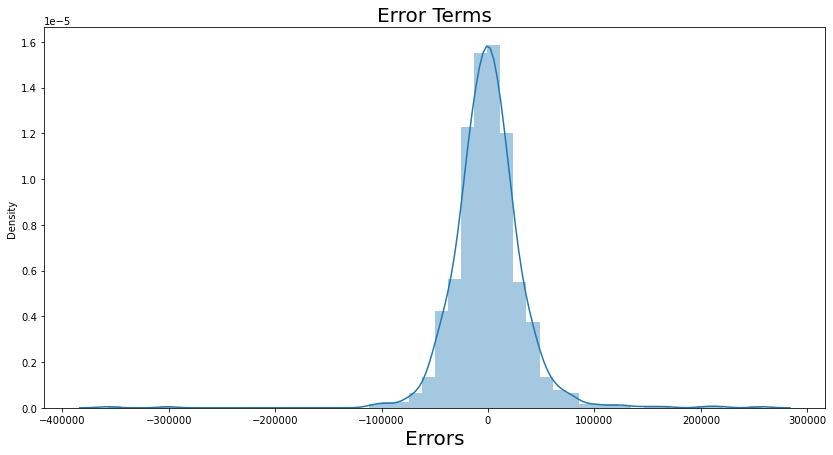

In [202]:
fig = plt.figure()
plt.figure(figsize=(14,7))
sns.distplot((y_train - y_train_cnst))
plt.title('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 20) 
plt.show()

 

Evaluate R2 of Train model

In [207]:
#evalate model
from sklearn.metrics import r2_score,mean_squared_error
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.81

In [208]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1240026113943.7314
1214521169.3866127
34849.980909415324


In [209]:
# Residual analysis
y_res = (y_train - y_train_cnst)

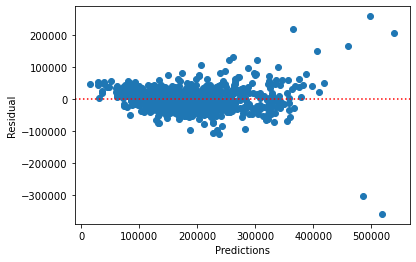

In [210]:
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

 Evalution on Test Data

In [211]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

C:\Users\Nishant\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [212]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [213]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [214]:
#trained model columns
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'LotShape_IR3', 'LotConfig_FR2',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc'],
      dtype='object')

In [215]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)


C:\Users\Nishant\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [216]:
#Running the Linear Model
test_lm = sm.OLS(y_test,X_test_new).fit()

In [217]:
#check summary()
test_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     117.6
Date:                Mon, 04 Jul 2022   Prob (F-statistic):          1.25e-157
Time:                        15:40:58   Log-Likelihood:                -5165.2
No. Observations:                 439   AIC:                         1.037e+04
Df Residuals:                     418   BIC:                         1.046e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.709e+05   3609.397     47.345      0.000    1.64e+05    1.78e+05
OverallQual           2.875e+04   2670.163     10.767      0.000    2.35e+04     3.4e+04
BsmtQual              8627.1441   2576.533      3.348      0.001    3562.568    1.37e+04
BsmtUnfSF            -1.131e+04   1819.309     -6.215      0.000   -1.49e+04   -7730.262
TotalBsmtSF            1.16e+04   4182.004      2.774      0.006    3380.824    1.98e+04
1stFlrSF              2.426e+04   3388.556      7.161      0.000    1.76e+04    3.09e+04
2ndFlrSF              2.785e+04   2936.521      9.483      0.000    2.21e+04    3.36e+04
GarageYrBlt           3265.5090   1702.343      1.918      0.056     -80.711    6611.729
MSSubClass_90        -1.521e+04   1.07e+04     -1.419      0.157   -3.63e+04    5855.792
MSSubClass_120       -2.956e+04   7776.649     -3.801      0.000   -4.48e+04   -1.43e+04
MSSubClass_160       -3.228e+04   8543.830     -3.778      0.000   -4.91e+04   -1.55e+04
LotShape_IR3         -3515.7634   3.23e+04     -0.109      0.913   -6.69e+04    5.99e+04
LotConfig_FR2         4853.0148   8304.472      0.584      0.559   -1.15e+04    2.12e+04
Neighborhood_NoRidge  2.959e+04   1.43e+04      2.073      0.039    1527.866    5.77e+04
Neighborhood_NridgHt  7.171e+04   8620.128      8.319      0.000    5.48e+04    8.87e+04
Neighborhood_StoneBr  8.346e+04   1.02e+04      8.197      0.000    6.34e+04    1.03e+05
Neighborhood_Veenker -1.698e-11   1.09e-11     -1.560      0.119   -3.84e-11    4.41e-12
HouseStyle_1Story     1.449e+04   5994.487      2.417      0.016    2703.124    2.63e+04
HouseStyle_2.5Fin     1.123e+04   1.67e+04      0.672      0.502   -2.16e+04    4.41e+04
Exterior1st_Stone    -2.703e-11    1.2e-11     -2.252      0.025   -5.06e-11   -3.44e-12
Exterior2nd_BrkFace   -694.2169   1.09e+04     -0.064      0.949   -2.22e+04    2.08e+04
Exterior2nd_CmentBd   1.367e+04   7363.313      1.857      0.064    -801.210    2.81e+04
Exterior2nd_ImStucc   4.518e+04   2.38e+04      1.898      0.058   -1616.190     9.2e+04
==============================================================================
Omnibus:                       81.279   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              507.056
Skew:                           0.610   Prob(JB):                    7.84e-111
Kurtosis:                       8.122   Cond. No.                     4.27e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.03e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [218]:
# Making predictions
y_pred = lm.predict(X_test_new)

calculate r2 score of Test model

In [219]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.82

In [220]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

501643991730.8211
1142697019.8879752
33803.80185553062


In [221]:
#drop the const
X_test_new = X_test_new.drop(['const'], axis=1)

In [222]:
#check final VIf of 9 columns
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,TotalBsmtSF,5.60
4,1stFlrSF,4.52
0,OverallQual,2.79
1,BsmtQual,2.61
5,2ndFlrSF,2.15
16,HouseStyle_1Story,2.04
8,MSSubClass_120,1.38
13,Neighborhood_NridgHt,1.35
2,BsmtUnfSF,1.30
12,Neighborhood_NoRidge,1.28


Text(0, 0.5, 'y_pred')

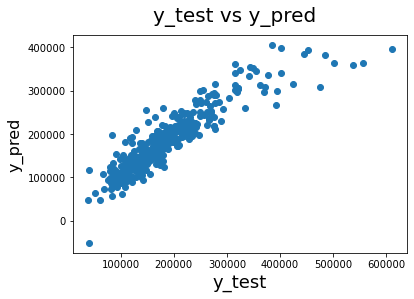

In [223]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [224]:
X_train_new.columns

Index(['OverallQual', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GarageYrBlt', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'LotShape_IR3', 'LotConfig_FR2',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'Exterior1st_Stone', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'Exterior2nd_ImStucc'],
      dtype='object')

In [227]:
#final dataframe 
final_df = housing_data[['OverallQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'MSSubClass_90'
                 , 'MSSubClass_160', 'MSZoning_RL', 'LotShape_IR3', 'LotConfig_CulDSac', 'Neighborhood_Crawfor'
                 , 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Neighborhood_StoneBr'
                 , 'Neighborhood_Veenker', 'Exterior1st_ImStucc', 'Exterior1st_Stucco', 'Exterior2nd_CmentBd'
                 , 'Exterior2nd_ImStucc', 'Exterior2nd_VinylSd']]
final_df.head()

,OverallQual,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,MSSubClass_90,MSSubClass_160,MSZoning_RL,LotShape_IR3,LotConfig_CulDSac,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Veenker,Exterior1st_ImStucc,Exterior1st_Stucco,Exterior2nd_CmentBd,Exterior2nd_ImStucc,Exterior2nd_VinylSd
0,7,150,856,856,854,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,6,284,1262,1262,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,7,434,920,920,866,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,7,540,756,961,756,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,490,1145,1145,1053,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1


# Final Result
. No of Variables = 21 i.e. OverallQual,BsmtUnfSF, TotalBsmtSF,1stFlrSF, 2ndFlrSF, MSSubClass_90, MSSubClass_160, MSZoning_RL, LotShape_IR3, LotConfig_CulDSac, Neighborhood_Crawfor , Neighborhood_NoRidge, Neighborhood_NridgHt, Neighborhood_Somerst, Neighborhood_StoneBr, Neighborhood_Veenker, Exterior1st_ImStucc, Exterior1st_Stucco, Exterior2nd_CmentBd , Exterior2nd_ImStucc, Exterior2nd_VinylSd

. VIF < 5
. p-value < 0.05

. r2 score for Train Data set model = 0.80

. r2 score for Test Data set model = 0.82

In [228]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.8056950805275328
0.8224724745532463
1240026113943.7314
501643991730.8211
1214521169.3866127
1142697019.8879752


Ridge Regression

In [233]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [234]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 10.0}


In [235]:
#Fitting Ridge model for alpha = 20 and printing coefficients which have been penalised
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 30599.61797689  14091.42649759  -7856.00459527    916.9792304
  27581.69233775  24203.63428145   2251.40140571  -8146.638534
 -19128.56164853 -21459.76227716 -15567.21439797  -8003.92926316
  40900.11351289  38023.32866852  13075.26069535  14639.50692042
  18392.91955077  -4606.10398293  -3674.52917243  11972.57748995
   8934.65552366   9288.59143805]


In [236]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8017751498607799
0.814603929684041
1265042548961.5347
523878336784.4571
1239023064.6048331
1193344730.716303


In [237]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [238]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [239]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=100)

In [240]:
lasso.coef_

array([ 30162.87583425,  14292.09498163,  -7819.50271917,      0.        ,
        27431.31921925,  24007.745693  ,   2266.05572252,  -7445.59591572,
       -22744.02887569, -24190.36427076, -19305.30279445,  -8154.52498734,
        52487.92945616,  45973.23590664,  19406.36825974,  20477.58370894,
        19258.73220311,     -0.        ,     -0.        ,  13172.57218254,
         9410.23815059,   7302.5431192 ])

In [241]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8040694251880928
0.8183593361546685
1250400813043.7373
513266590308.7683
1224682480.9439151
1169172187.4914997


In [242]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.056951e-01,8.017751e-01,8.040694e-01
1,R2 Score (Test),8.224725e-01,8.146039e-01,8.183593e-01
2,RSS (Train),1.240026e+12,1.265043e+12,1.250401e+12
3,RSS (Test),5.016440e+11,5.238783e+11,5.132666e+11
4,MSE (Train),3.484998e+04,3.519976e+04,3.499546e+04
5,MSE (Test),3.380380e+04,3.454482e+04,3.419316e+04


The changes in the coefficients after regularization

In [243]:
betas = pd.DataFrame(index=X.columns)

In [244]:
betas.rows = X.columns

C:\Users\Nishant\AppData\Local\Temp/ipykernel_5164/3817019565.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  betas.rows = X.columns


In [245]:
betas['Linear'] = lm.params
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [246]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
OverallQual,29382.427906,30599.617977,30162.875834
BsmtQual,14931.595804,14091.426498,14292.094982
BsmtUnfSF,-7870.127502,-7856.004595,-7819.502719
TotalBsmtSF,-1239.061151,916.979230,0.000000
1stFlrSF,28166.243979,27581.692338,27431.319219
2ndFlrSF,24891.837327,24203.634281,24007.745693
GarageYrBlt,2289.602699,2251.401406,2266.055723
MSSubClass_90,-11110.502721,-8146.638534,-7445.595916
MSSubClass_120,-27548.894107,-19128.561649,-22744.028876
MSSubClass_160,-27231.814913,-21459.762277,-24190.364271


### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


In [250]:
#earlier for Ridge alpha = 10 now take 20
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_new, y_train)
print(ridge.coef_)
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 30977.61898859  13634.29328099  -7708.49759941   2287.33003467
  27237.68623065  23623.33589853   2260.0717461   -6584.13081094
 -14886.95115607 -17856.99186355 -10600.01681518  -5875.65952412
  32659.51566731  31188.08179206   7801.85282643   9455.18221753
  16219.71953645  -2620.69235252  -1961.37352915   8381.31796371
   6691.63328594   5962.6281864 ]
0.7971143898927883
0.8095249510764655


_Coeff values are increasing as alpha will increase.r2score of train data is also drop from .807 to 0.45

In [251]:
#earlier for Lasso alpha = 100 now take 200
alpha =200

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 
print(lasso.coef_)
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

[ 30713.22342435  14114.65047355  -7629.64336912      0.
  27820.51485648  23387.29973791   2146.18366904  -4565.73243169
 -18122.8370543  -21130.29865029  -7596.04855467  -3794.53014832
  49245.93281745  41805.86079914   8481.84788697  10248.62612131
  17749.16587461     -0.             -0.           6586.17263242
   6057.88006229      0.        ]
0.8005693230412866
0.810845107662803


##### Drop the Top 5 features and rebuild lasso

In [253]:

X_train_new = X_train_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [254]:
X_test_new = X_test_new.drop(['Neighborhood_NoRidge', 'Neighborhood_NridgHt', '2ndFlrSF', 'OverallQual'
                               , 'Neighborhood_Veenker'], axis=1)

In [255]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [256]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [257]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_new, y_train) 

Lasso(alpha=500)

In [258]:
lasso.coef_

array([ 31468.53289115,  -2360.30198915,     -0.        ,  44970.122498  ,
         6500.9911306 ,  -5881.46407646,     -0.        ,   -421.61212457,
           -0.        ,     -0.        ,      0.        , -35746.86600811,
           -0.        ,     -0.        ,      0.        ,      0.        ,
            0.        ])

In [259]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_new)

r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)

0.6075926751042532
0.6355231265420795


After dropping the top 5 features model r2 score is very low i.e. 45% for Train and 44% for Test.

In [261]:
X_train_new.columns

Index(['BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 'GarageYrBlt',
       'MSSubClass_90', 'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3',
       'LotConfig_FR2', 'Neighborhood_StoneBr', 'HouseStyle_1Story',
       'HouseStyle_2.5Fin', 'Exterior1st_Stone', 'Exterior2nd_BrkFace',
       'Exterior2nd_CmentBd', 'Exterior2nd_ImStucc'],
      dtype='object')